Exploratory data analysis of IPL data
--------------------------------------------------
Vamsi Krishna | May'17

Being a ardent cricket fan and a data science enthusiast this dataset is virtual gold! Been tinkering with this dataset for 2 days now, found some really cool insights.

In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
#library(plyr)
library(dplyr)
library(gridExtra)
library(treemap)
library(RColorBrewer)
library(tidyr)
library(radarchart)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")
deliveries<-read.csv("../input//ipl//deliveries.csv")
matches<-read.csv("../input/ipl/matches.csv")
matches<-matches[matches$result=="normal",]
# Any results you write to the current directory are saved as output.


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



Cricket is a simple game you win or you lose but there is a lot of grey area as well. It is a battle of nerves as much as it is test of skill. Lot of games in IPL go down to the wire, let us see which teams have been able to withstand pressure and win the close games!


**Closeness of the matches when the team batting first wins**
-------------------------------------------------------------

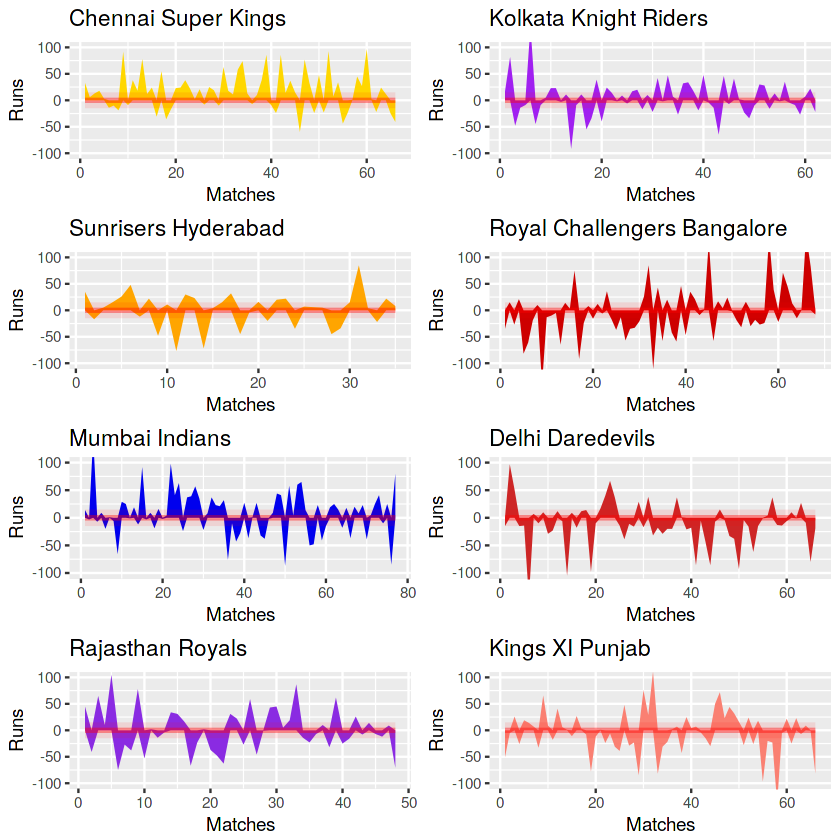

In [2]:
matches[which(as.character(matches$team2)==as.character(matches$winner)),"loser"]<- matches[which(as.character(matches$team2)==as.character(matches$winner)),"team1"]
matches[which(as.character(matches$team1)==as.character(matches$winner)),"loser"]<- matches[which(as.character(matches$team1)==as.character(matches$winner)),"team2"]


matches1<-matches[matches$win_by_runs!=0,]
closeness<-function(x,y = "gold" ){
  data1<-matches1[matches1$winner==x|matches1$loser==x,]
  data1[data1$loser==x,"win_by_runs"]<- -data1[data1$loser==x,"win_by_runs"]
  ggplot(data1,aes(1:nrow(data1),win_by_runs))+ geom_area(fill=y)+ggtitle(x)+
    ylab("Runs")+ xlab("Matches")+ geom_ribbon(aes(ymin=-5, ymax=5),fill="red",alpha=0.4) +geom_ribbon(aes(ymin=-15, ymax=15),fill="red",alpha=0.1) +
    guides(fill=FALSE)+scale_alpha(guide = 'none')+coord_cartesian(ylim = c(-100, 100)) 
}
a<-closeness("Chennai Super Kings")
b<-closeness("Kolkata Knight Riders","purple")
c<-closeness("Sunrisers Hyderabad","orange")
d<-closeness("Mumbai Indians","blue2")
e<-closeness("Royal Challengers Bangalore","red3")
f<-closeness("Delhi Daredevils","firebrick3")
g<-closeness("Rajasthan Royals","blueviolet")
h<-closeness("Kings XI Punjab","salmon")
grid.arrange(a,b,c,e,d,f,g,h,ncol=2)



Number of matches played in different cities
--------------------------------------------


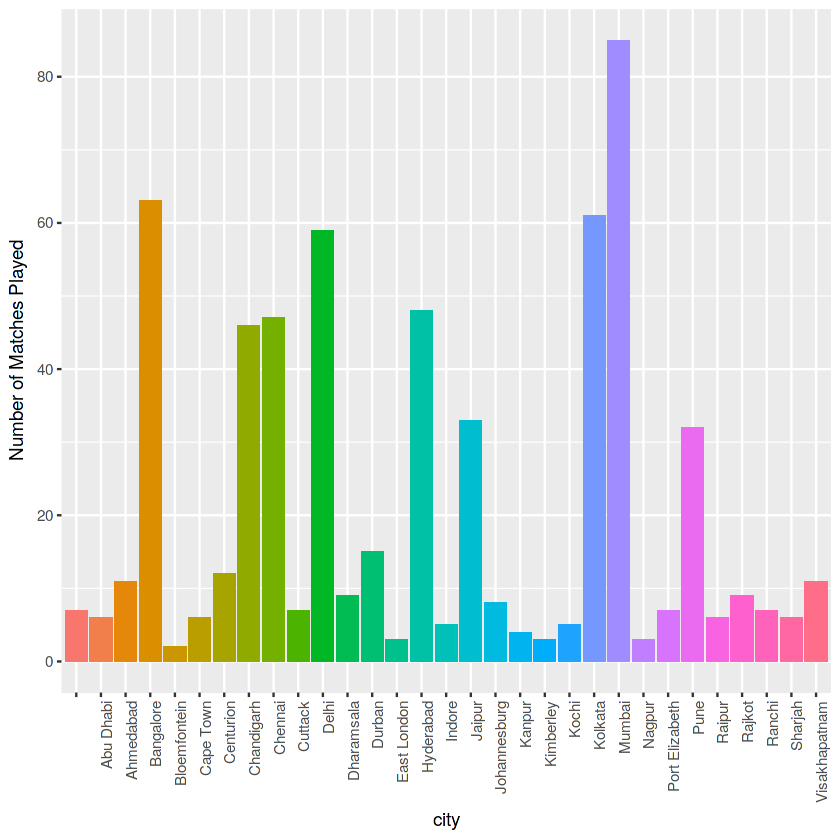

In [3]:

ggplot(matches[which(!is.na(matches$city)),],aes(city,fill= city,rm.na=T)) +geom_bar() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
ylab("Number of Matches Played") +
guides(fill=FALSE)

Number of matches played in different stadiums
----------------------------------------------

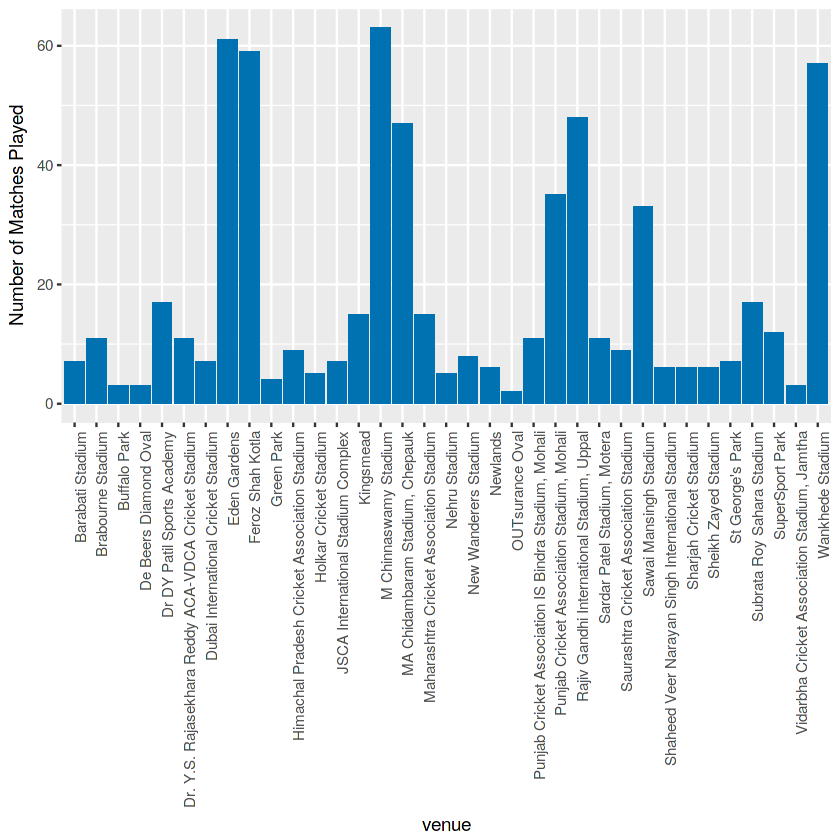

In [4]:

ggplot(matches,aes(venue, rm.na=T)) +geom_bar(fill="#0072B2") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ 
ylab("Number of Matches Played") 

Is winning the toss really an advantage?
----------------------------------------

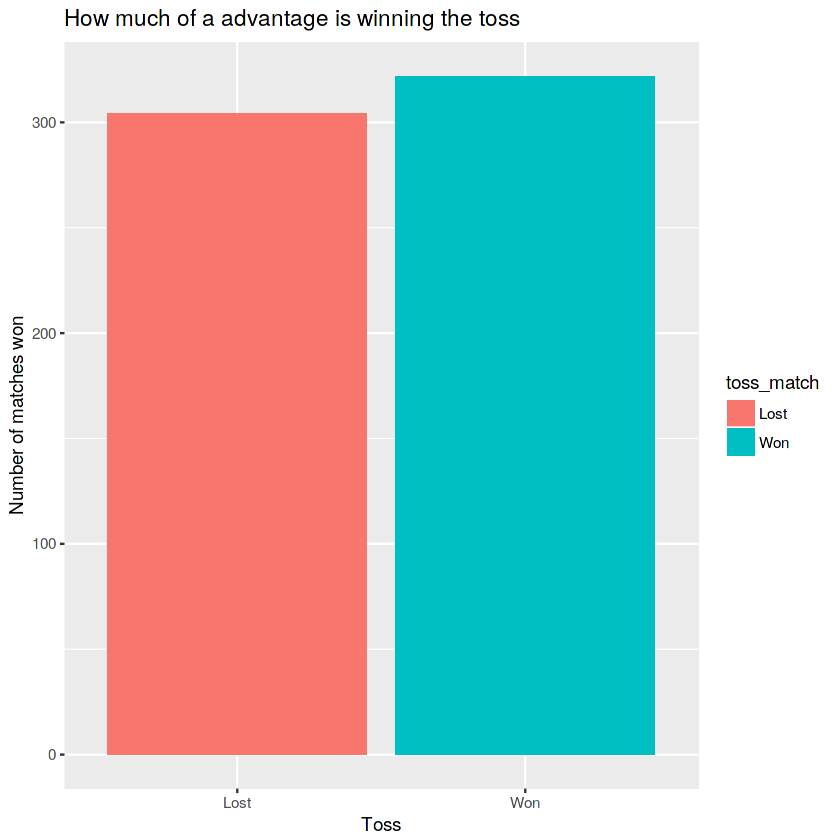

In [5]:
matches$toss_match<-ifelse(as.character(matches$toss_winner)==as.character(matches$winner),"Won","Lost")
ggplot(matches[which(!is.na(matches$toss_match)),],aes(toss_match, fill = toss_match))+ 
geom_bar()+ xlab("Toss") +ylab("Number of matches won")+ ggtitle("How much of a advantage is winning the toss")

Is home advantage a real thing in IPL?
----------------------

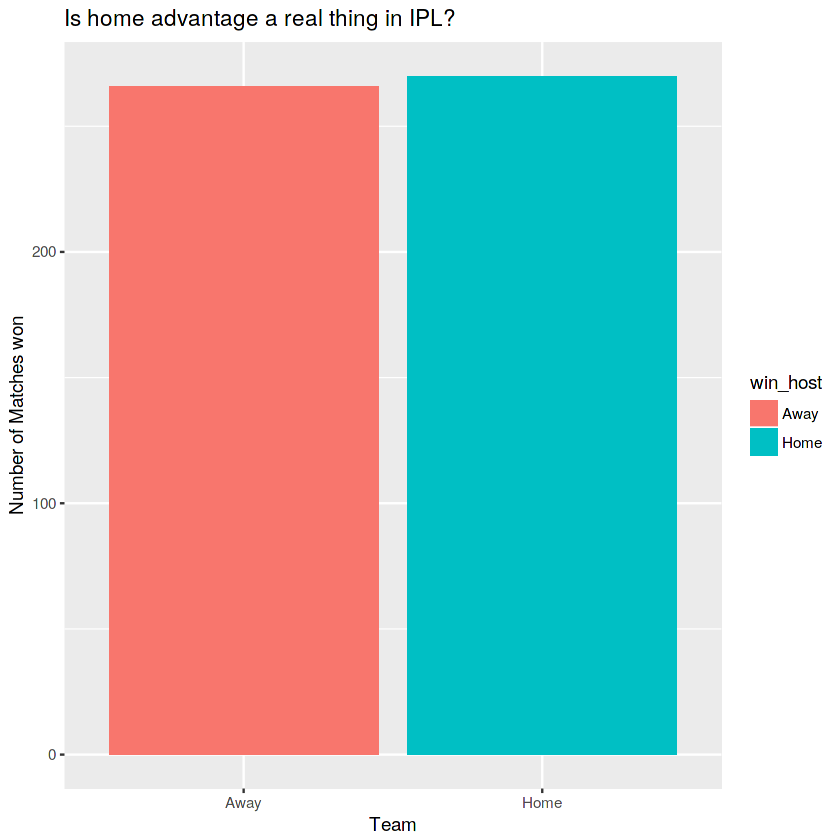

In [6]:
Data<-matches[matches$season!="2009",]
Data$date<- as.Date(Data$date)
Data1<-Data[Data$date < as.Date("2014-04-16") | Data$date > as.Date("2014-04-30"),]
Data1$home_team[Data1$city=="Bangalore"]<- "Royal Challengers Bangalore"
Data1$home_team[Data1$city=="Chennai"]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Delhi"]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Chandigarh"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Jaipur"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Mumbai"]<- "Mumbai Indians"
Data1$home_team[Data1$city=="Kolkata"]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Kochi"]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season <=2012]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Hyderabad" & Data1$season >2012]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ahmedabad"]<- "Rajasthan Royals"
Data1$home_team[Data1$city=="Dharamsala"]<- "Kings XI Punjab"
Data1$home_team[Data1$city=="Visakhapatnam" & Data1$season== 2015]<- "Sunrisers Hyderabad"
Data1$home_team[Data1$city=="Ranchi" & Data1$season== 2013]<- "Kolkata Knight Riders"
Data1$home_team[Data1$city=="Ranchi" & Data1$season > 2013]<- "Chennai Super Kings"
Data1$home_team[Data1$city=="Rajkot" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Kanpur" ]<- "Gujarat Lions"
Data1$home_team[Data1$city=="Raipur" ]<- "Delhi Daredevils"
Data1$home_team[Data1$city=="Nagpur" ]<- "Deccan Chargers"
Data1$home_team[Data1$city=="Indore" ]<- "Kochi Tuskers Kerala"
Data1$home_team[Data1$city=="Pune" & Data1$season!= 2016]<- "Pune Warriors"
Data1$home_team[Data1$city=="Pune" & Data1$season== 2016]<- "Rising Pune Supergiants"
Data1<-Data1[ which(!is.na(Data1$home_team)),]
Data1$win_host <- ifelse(as.character(Data1$winner)==as.character(Data1$home_team),"Home","Away")

ggplot(Data1[which(!is.na(Data1$win_host)),],aes(win_host,fill= win_host))+geom_bar()+
  ggtitle("Is home advantage a real thing in IPL?")+
  xlab("Team")+
  ylab("Number of Matches won")+labs(aesthetic="Winner")   

Number of matches played by each team
-------------------------------------

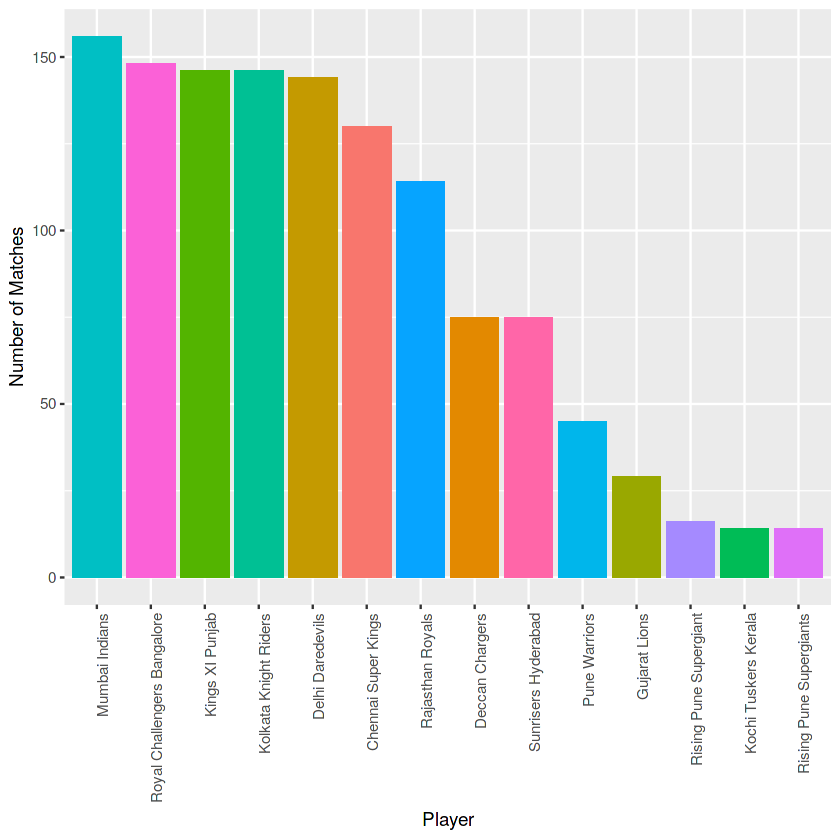

In [7]:
ggplot(as.data.frame(table(matches$team2) + table(matches$team1)),aes(reorder(Var1,-Freq),Freq,fill = Var1)) +geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+
  ylab("Number of Matches") +guides(fill=FALSE)

Number of Matches won by each teams
-----------------------------------

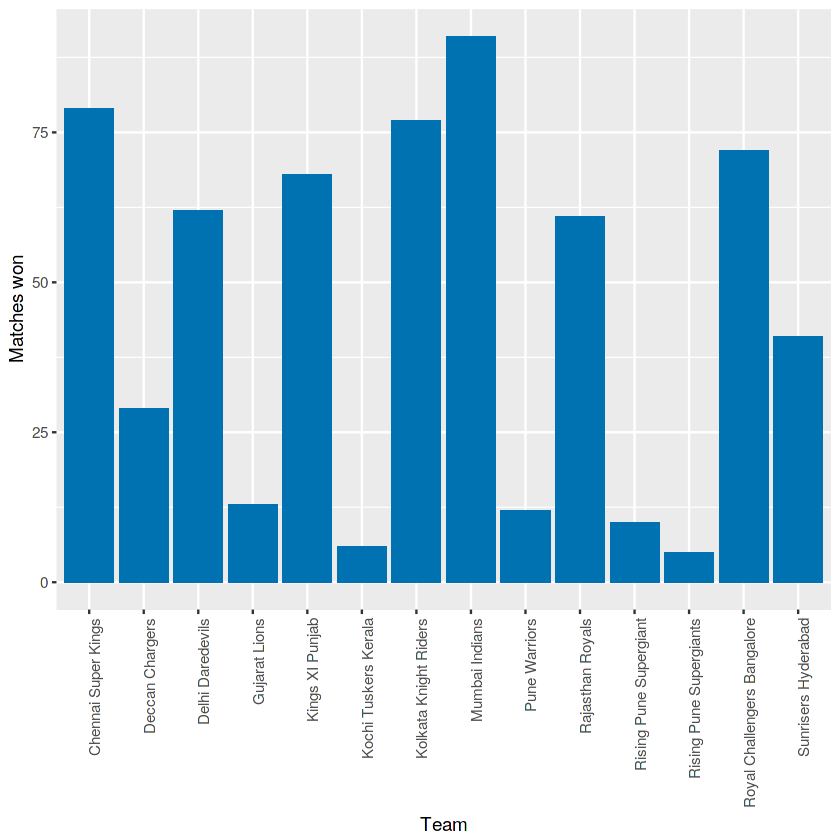

In [8]:
ggplot(matches,aes(winner)) +geom_bar(fill="#0072B2") +
theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
ylab("Matches won") 

Win percentage of each team in IPL
----------------------------------

Joining, by = "Var1"
Warning message:
“Column `Var1` joining factors with different levels, coercing to character vector”

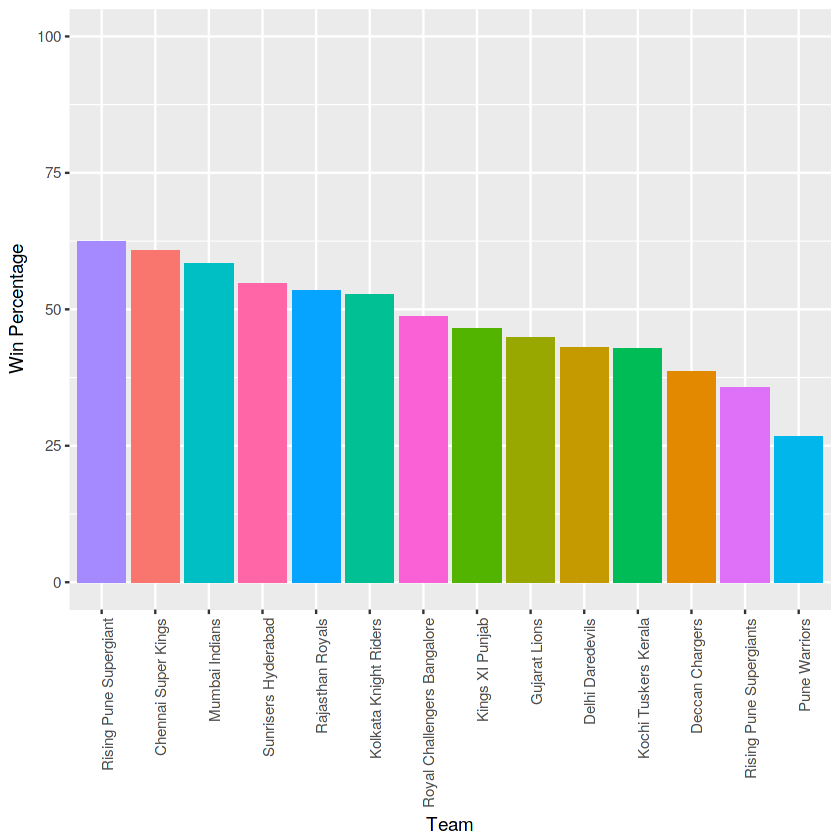

In [9]:
matches_won<-as.data.frame(table(matches$winner))
colnames(matches_won)[2]<-"Won"
matches_played<-as.data.frame(table(matches$team2) + table(matches$team1))
colnames(matches_played)[2]<-"Played"

ggplot(left_join(matches_played,matches_won ),aes(reorder(Var1,-Won/Played),Won*100/Played,fill = Var1)) +geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Team")+
  ylab("Win Percentage") +  guides(fill=FALSE)+coord_cartesian(ylim = c(0, 100)) 

<!-- > Margin of victories in IPL -->
--------------------------

In [10]:
#   ggplot(matches[matches$win_by_runs!=0,],aes(id,win_by_runs,col= winner )) + geom_point() +
#   ylab("Runs won by ") + xlab("Matches won by team batting first")+
#   ggtitle("Margin of Victories(Won by team batting first)")+ 
#   scale_y_continuous(breaks=c(0,25,50,75,100))  
# ggplot(matches[matches$win_by_wickets!=0,],aes(id,win_by_wickets,col= winner )) + geom_point() +
#   ylab("Wickets won by ") + xlab("Matches won by team bowling first")+
#   ggtitle("Margin of Victories(Won by team bowling first)")+
#   scale_y_continuous(breaks=c(2,4,6,8,10))

Top Batsmen
-----------

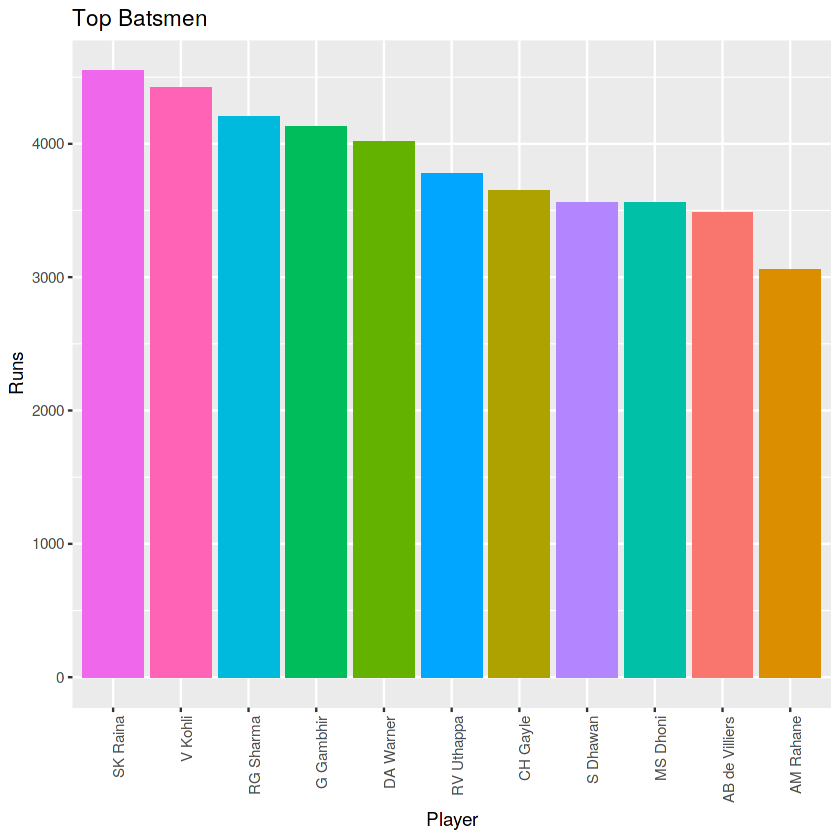

In [11]:
 df<- deliveries %>% group_by(batsman)%>% summarise(runs=sum(batsman_runs)) %>% arrange(desc(runs)) %>%
  filter(runs > 3000) 
  df %>% ggplot(aes(reorder(batsman,-runs),runs,fill=batsman)) +geom_bar(stat = "identity") +xlab("Batsman")+ ylab("Runs")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ ggtitle("Top Batsmen")+ guides(fill=F)

Best seat in the house => Non-striker's end!
--------------------------------------------
Compare this plot with the earlier one, it clearly shows without significant contribution from the other end you cant accumulate runs unless you are CH GAYLE of course

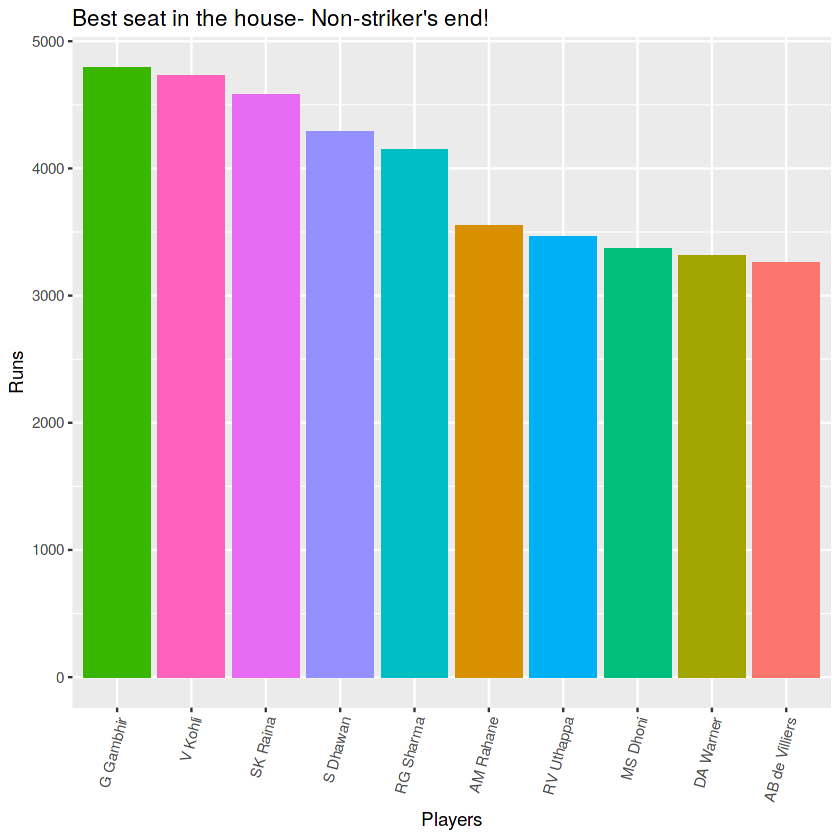

In [12]:
 deliveries %>% group_by(non_striker) %>% 
    summarise(Runs= sum(total_runs)) %>% top_n(n=10,wt= Runs) %>% ggplot(aes(reorder(non_striker,-Runs),Runs,fill=non_striker)) + geom_bar(stat="identity")+ xlab("Players") +
    theme(axis.text.x = element_text(angle = 75, hjust = 1)) + guides(fill=F) + ggtitle("Best seat in the house- Non-striker's end!") 

Top Bowlers
-----------

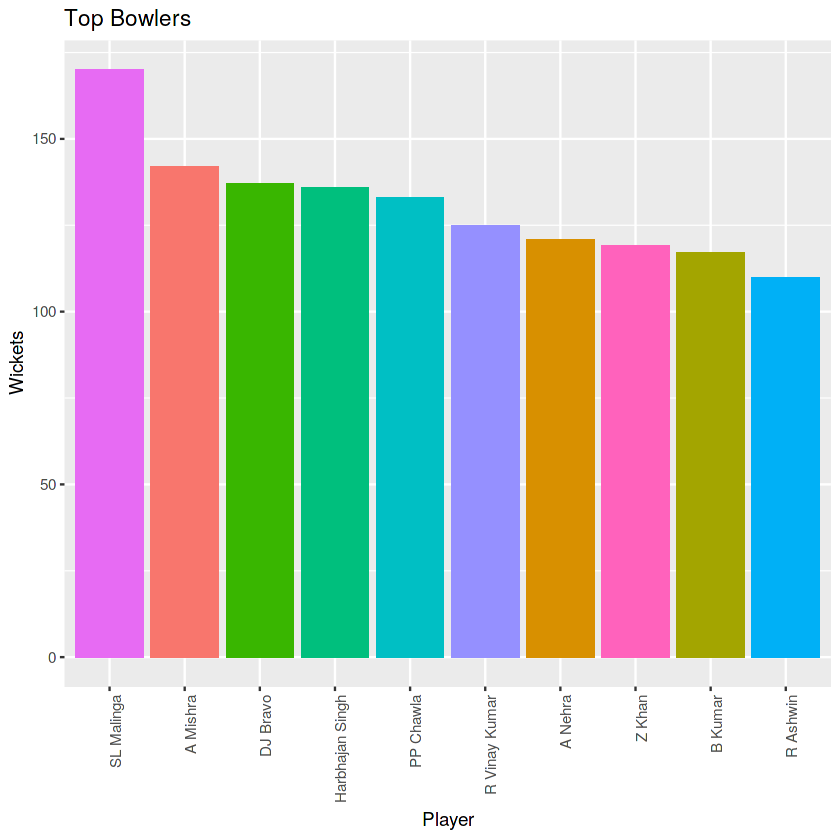

In [13]:
df<-deliveries %>% group_by(bowler) %>% filter(player_dismissed!="") %>% summarise(wickets= length(player_dismissed)) %>% top_n(n=10,wt=wickets) 
  df %>% ggplot(aes(reorder(bowler,-wickets),wickets,fill=bowler))+geom_bar(stat = "identity") + ylab("Wickets")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+ xlab("Player")+ ggtitle("Top Bowlers")+ guides(fill=F)

Total runs scored in each delivery of the over
----------------------------------------------

# A tibble: 6 x 2
   ball  Runs
  <int> <int>
1     1 30523
2     2 31329
3     3 31512
4     4 31745
5     5 31485
6     6 31017


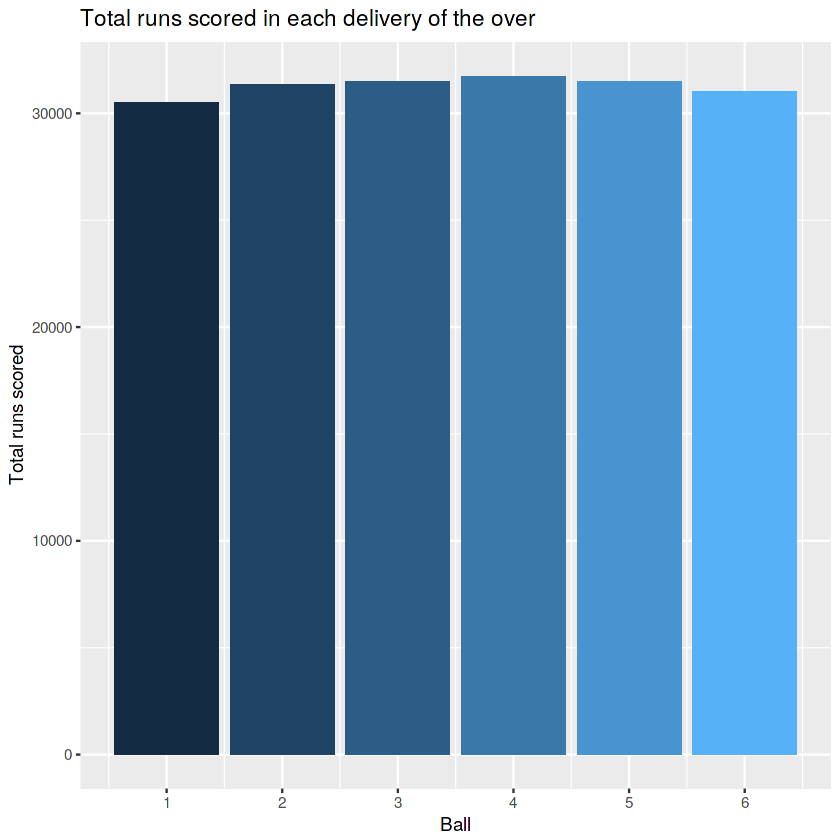

In [14]:
df <- deliveries %>% group_by(ball) %>% summarise(Runs = sum(total_runs)) %>% filter(ball<7) 
  print(df)
  df %>% ggplot(aes(ball,Runs,fill=ball)) +geom_bar(stat = "identity")+scale_x_continuous(breaks = c(1,2,3,4,5,6))+ 
  guides(fill=F) +xlab("Ball") + ylab("Total runs scored") + ggtitle("Total runs scored in each delivery of the over")


Average number of runs scored in each delivery of the over
----------------------------------------------------------

# A tibble: 6 x 2
   ball     Runs
  <int>    <dbl>
1     1 1.251096
2     2 1.287670
3     3 1.298875
4     4 1.311668
5     5 1.305186
6     6 1.290171


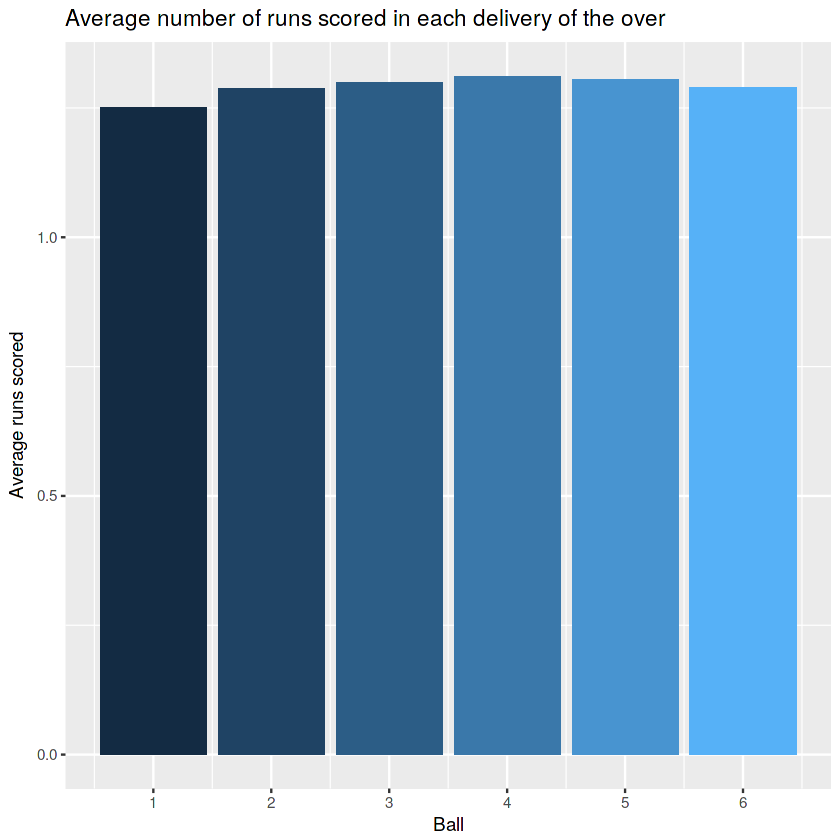

In [15]:
df<-deliveries %>% group_by(ball) %>% summarise(Runs = mean(total_runs)) %>% filter(ball<7)
  print(df)
  df %>% ggplot(aes(ball,Runs,fill=ball)) +geom_bar(stat = "identity")+scale_x_continuous(breaks = c(1,2,3,4,5,6))+ 
  guides(fill=F) +xlab("Ball") + ylab("Average runs scored") + ggtitle("Average number of runs scored in each delivery of the over")

Total number of runs scored in each over of the innings
-------------------------------------------------------

# A tibble: 20 x 2
    over  Runs
   <int> <int>
 1     1  7560
 2     2  8993
 3     3  9852
 4     4 10207
 5     5 10227
 6     6 10397
 7     7  8413
 8     8  8966
 9     9  9247
10    10  9047
11    11  9456
12    12  9694
13    13  9713
14    14  9900
15    15 10240
16    16 10397
17    17 10817
18    18 10899
19    19 10469
20    20  9647


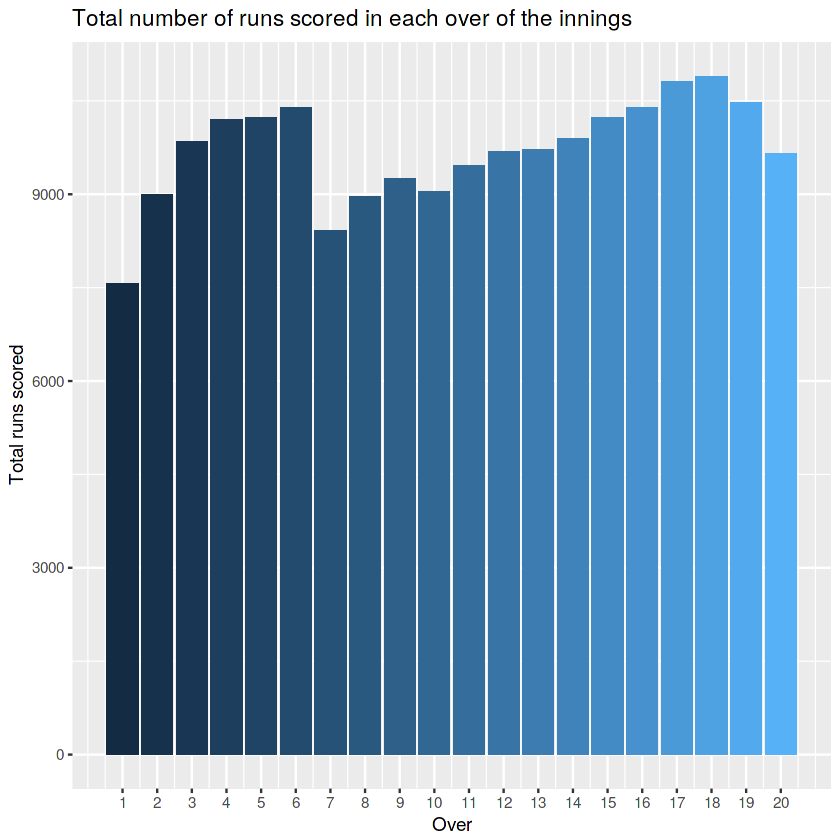

In [16]:
df <- deliveries %>% group_by(over) %>% filter(is_super_over==0) %>% summarise(Runs= sum(total_runs))
  print(df)
  df %>% ggplot(aes(over,Runs,fill=over))+geom_bar(stat = "identity")+scale_x_continuous(breaks = 1:20)+ 
   guides(fill=F) +xlab("Over") + ylab("Total runs scored") + ggtitle("Total number of runs scored in each over of the innings")
  

Average number of runs scored in each over of the innings
---------------------------------------------------------

# A tibble: 20 x 2
    over      Runs
   <int>     <dbl>
 1     1  5.662214
 2     2  6.729608
 3     3  7.452345
 4     4  7.750190
 5     5  7.792990
 6     6  7.931596
 7     7  6.449214
 8     8  6.897807
 9     9  7.135949
10    10  7.025887
11    11  7.399061
12    12  7.616080
13    13  7.653053
14    14  7.882166
15    15  8.239238
16    16  8.508183
17    17  8.971800
18    18  9.370110
19    19  9.600183
20    20 10.246415


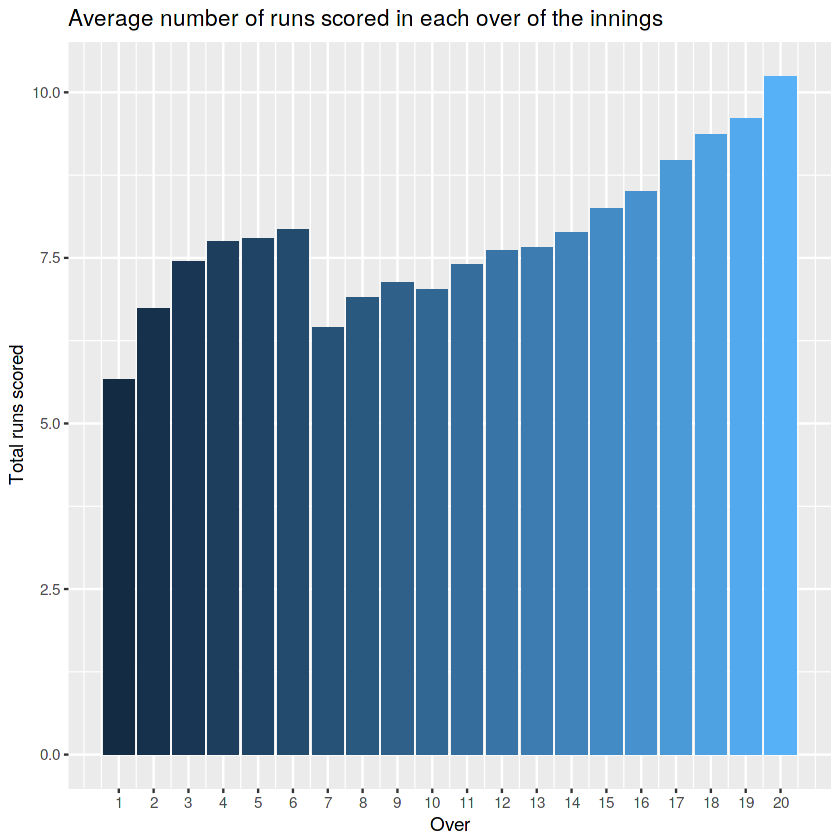

In [17]:
df <- deliveries %>% group_by(over) %>% filter(is_super_over==0) %>% summarise(Runs= mean(total_runs)*6)
  print(df)
  df %>% ggplot(aes(over,Runs,fill=over))+geom_bar(stat = "identity")+scale_x_continuous(breaks = 1:20)+ 
  guides(fill=F) +xlab("Over") + ylab("Total runs scored") + ggtitle("Average number of runs scored in each over of the innings")

Total number of wickets in each over of the innings
---------------------------------------------------

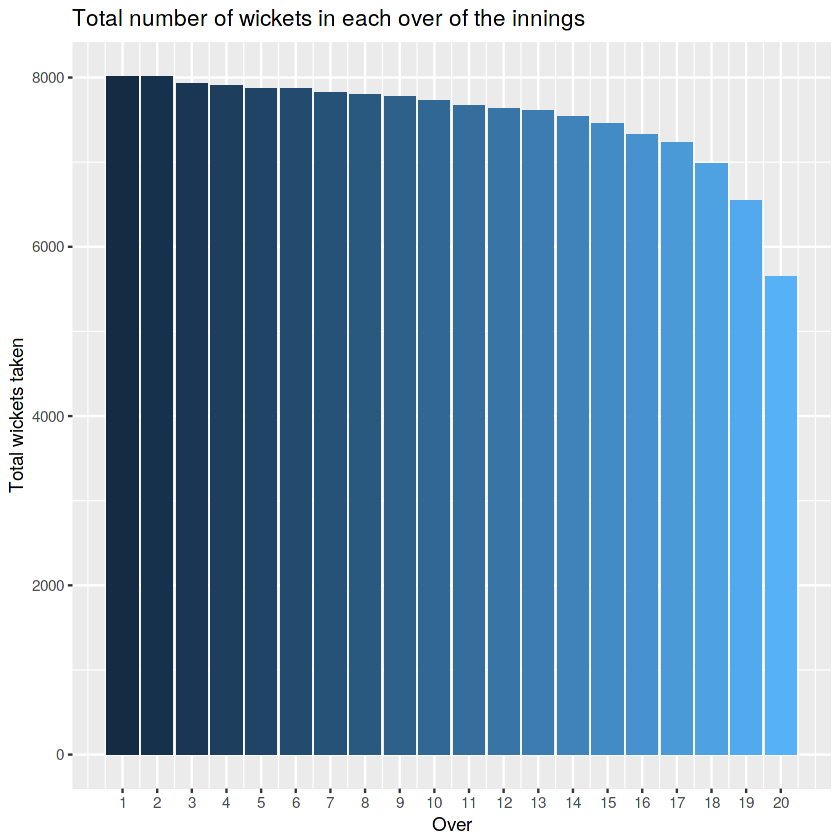

In [18]:
 deliveries %>% group_by(over) %>% filter(is_super_over==0) %>% summarise(Wickets= length(player_dismissed)) %>% 
    ggplot(aes(over,Wickets,fill=over))+geom_bar(stat = "identity") +scale_x_continuous(breaks = 1:20)+ 
     guides(fill=F) +xlab("Over") + ylab("Total wickets taken") + ggtitle("Total number of wickets in each over of the innings")
  

Batsmen with top strike rate
----------------------------

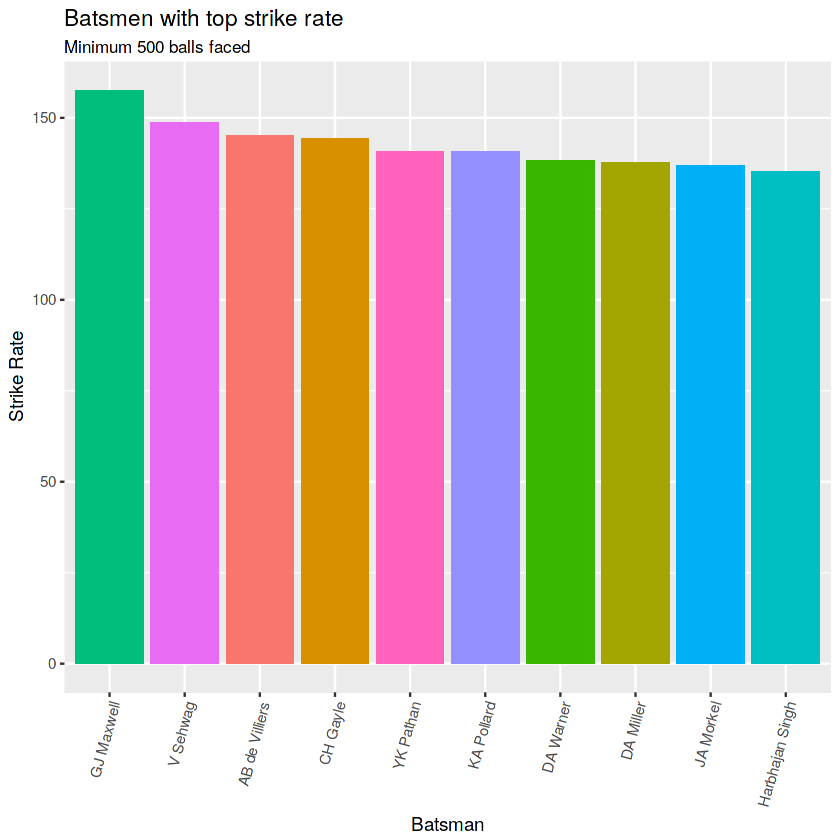

In [19]:
deliveries %>% group_by(batsman) %>% filter(length(total_runs)>500) %>% summarise(strike_rate= mean(batsman_runs)*100) %>% top_n(n=10,wt=strike_rate) %>%
  ggplot(aes(reorder(batsman,-strike_rate),strike_rate,fill=batsman))+ geom_bar(stat="identity")+ xlab("Batsman") + ylab("Strike Rate") +
  ggtitle("Batsmen with top strike rate",subtitle = "Minimum 500 balls faced")+
    theme(axis.text.x = element_text(angle = 75, hjust = 1)) + guides(fill=F)

Comparing the all time top run getters in IPL 
---------------------------------------------
**(V Kohli, R Sharma, S Raina, G Gambhir)**


**Against which bowlers have the top run-getters performed?**


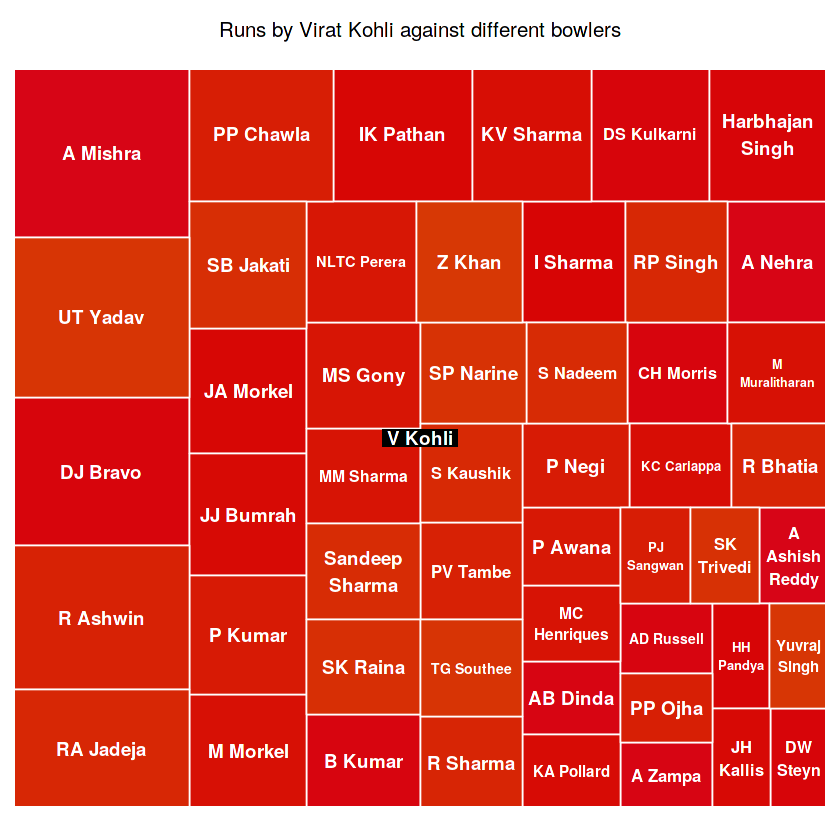

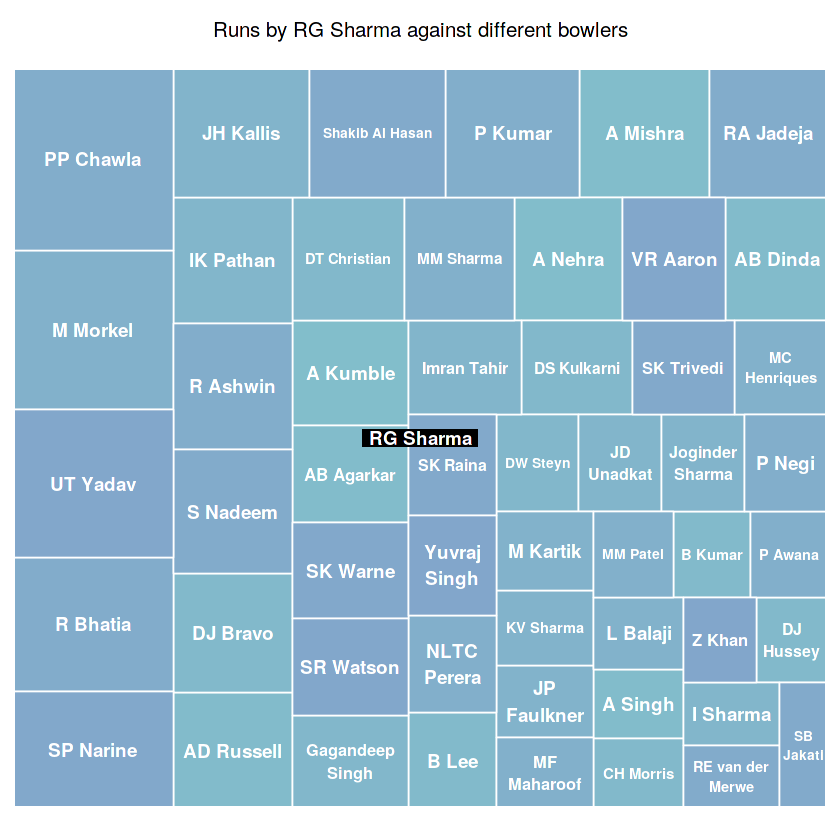

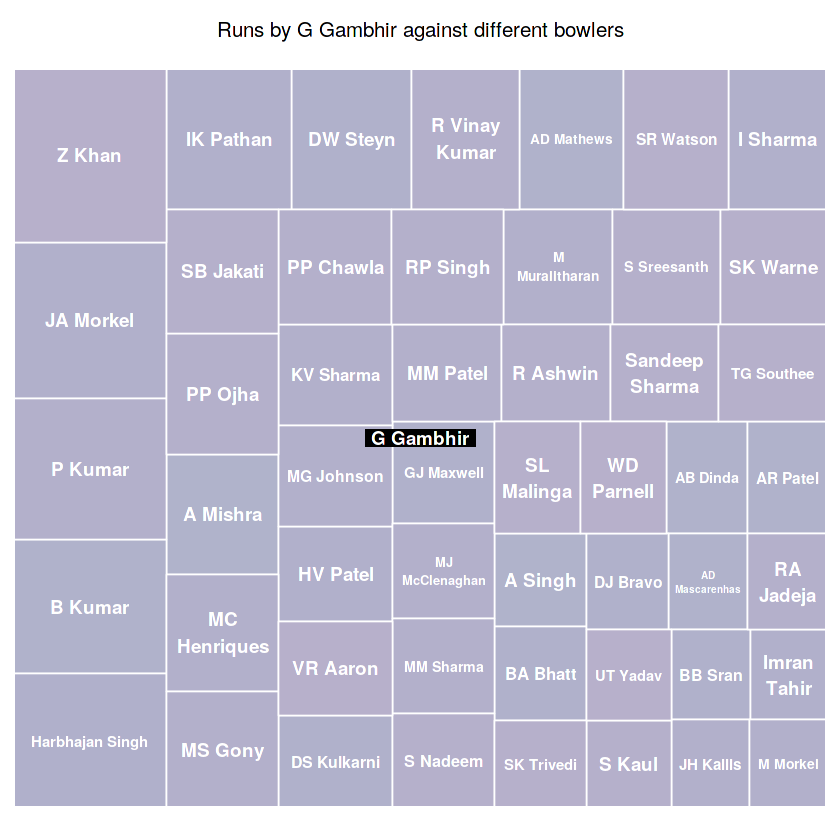

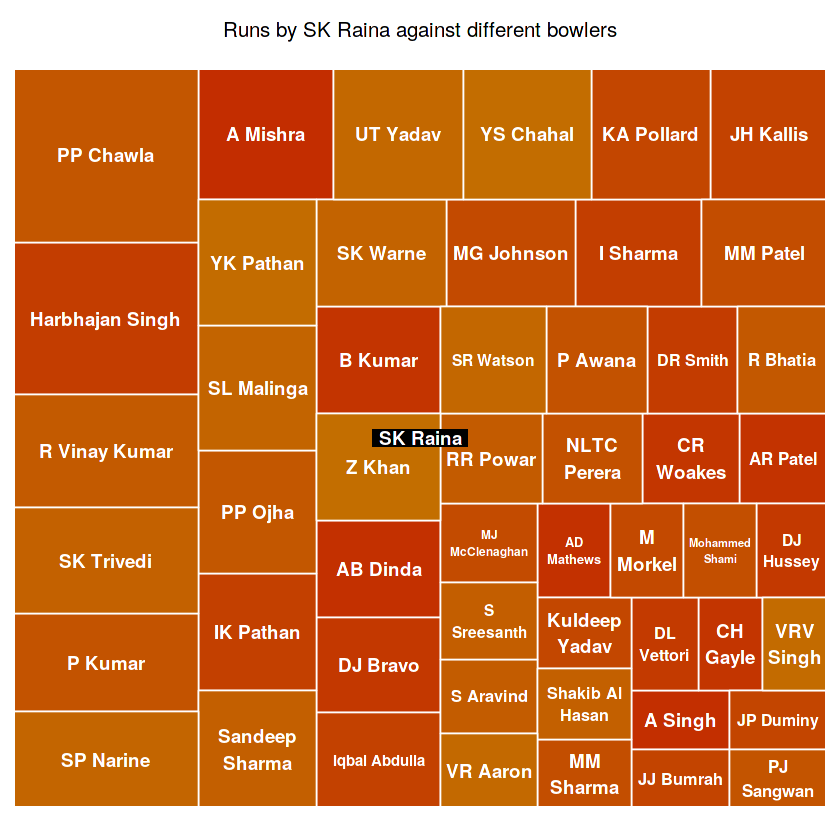

In [20]:
Kohli<- deliveries %>% group_by(batsman,bowler) %>% filter(batsman=="V Kohli") %>% summarise(runs=sum(batsman_runs)) %>% top_n(n=50,wt=runs)
Rohit<- deliveries %>% group_by(batsman,bowler) %>% filter(batsman=="RG Sharma") %>% summarise(runs=sum(batsman_runs)) %>% top_n(n=50,wt=runs)
Gambhir<- deliveries %>% group_by(batsman,bowler) %>% filter(batsman=="G Gambhir") %>% summarise(runs=sum(batsman_runs)) %>% top_n(n=50,wt=runs)
Raina<- deliveries %>% group_by(batsman,bowler) %>% filter(batsman=="SK Raina") %>% summarise(runs=sum(batsman_runs)) %>% top_n(n=50,wt=runs)
treemap(Kohli, #Your data frame object
          index=c("batsman","bowler"),  #A list of your categorical variables
          vSize = "runs",  #This is your quantitative variable
          type="index", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(7,"Reds"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 12,
          fontfamily.title = "serif",
          fontfamily.labels = "symbol",
          title = "Runs by Virat Kohli against different bowlers",
          fontface.labels = "bold",
          border.col="#FFFFFF",
          fontsize.legend = 0,bg.labels = "black",fontcolor.labels= "#FFFFFF",
          aspRatio= 1.1
 )
treemap(Rohit, #Your data frame object
          index=c("batsman","bowler"),  #A list of your categorical variables
          vSize = "runs",  #This is your quantitative variable
          type="index", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(7,"Blues"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 12,
          fontfamily.title = "serif",
          fontfamily.labels = "symbol",
          title = "Runs by RG Sharma against different bowlers",
          fontface.labels = "bold",
           border.col="#FFFFFF",
           fontsize.legend = 0,bg.labels = "black",fontcolor.labels= "#FFFFFF",
          aspRatio= 1.1
 )
treemap(Gambhir, #Your data frame object
          index=c("batsman","bowler"),  #A list of your categorical variables
          vSize = "runs",  #This is your quantitative variable
          type="index", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(4,"Purples"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 12,
          fontfamily.title = "serif",
          fontfamily.labels = "symbol",
          title = "Runs by G Gambhir against different bowlers",
          fontface.labels = "bold",
          border.col="#FFFFFF",
          fontsize.legend = 0,bg.labels = "black",fontcolor.labels= "#FFFFFF",
          aspRatio= 1.1
 )
treemap(Raina, #Your data frame object
          index=c("batsman","bowler"),  #A list of your categorical variables
          vSize = "runs",  #This is your quantitative variable
          type="index", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(3,"YlOrBr"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 12,
          fontfamily.title = "serif",
          fontfamily.labels = "symbol",
          title = "Runs by SK Raina against different bowlers",
          fontface.labels = "bold",
          border.col="#FFFFFF",
          fontsize.legend = 0,
          bg.labels = "black",fontcolor.labels= "#FFFFFF",
           aspRatio= 1.1
 )

**Top run getters performance against different teams**


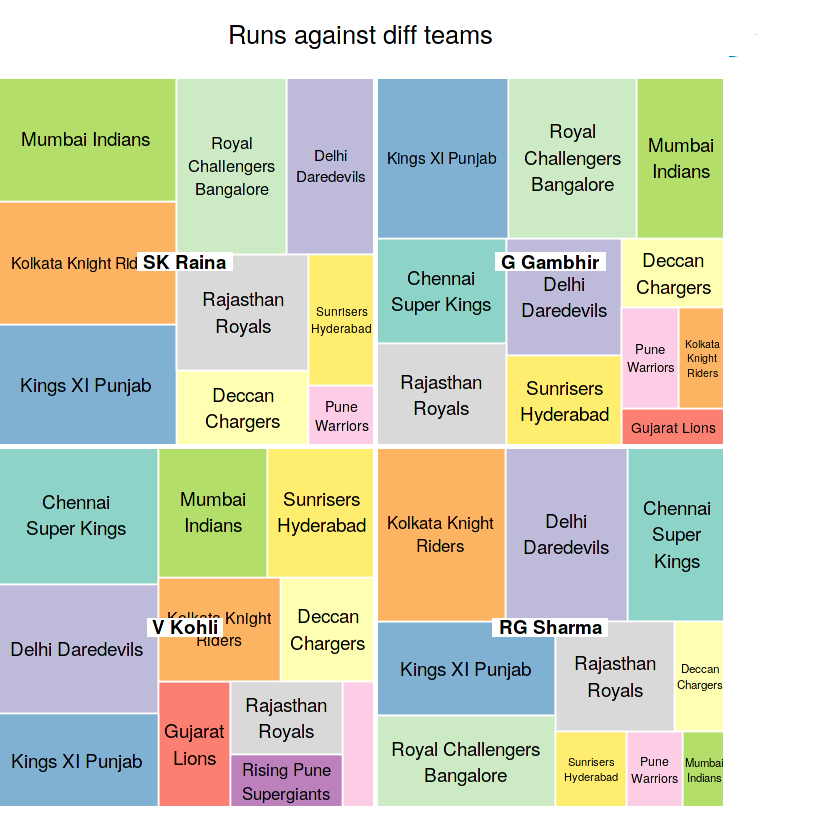

In [21]:
 df<-deliveries %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir")  %>% 
 group_by(batsman,bowling_team) %>% summarise(runs = sum(batsman_runs)) %>% filter(runs >100)
  treemap(df, #Your data frame object
          index=c("batsman","bowling_team"),  #A list of your categorical variables
          vSize = "runs", 
          vColor = "bowling_team",
          type="categorical", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(12,"Set3"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 15,
          fontfamily.title = "serif",
          fontfamily.labels = "symbol",
          title = "Runs against diff teams",
          aspRatio = 1,
          border.col="#FFFFFF",bg.labels = "#FFFFFF" ,fontcolor.labels= "black",fontsize.legend = 0
  )

**Batting with whom have our top run getters been successful?**


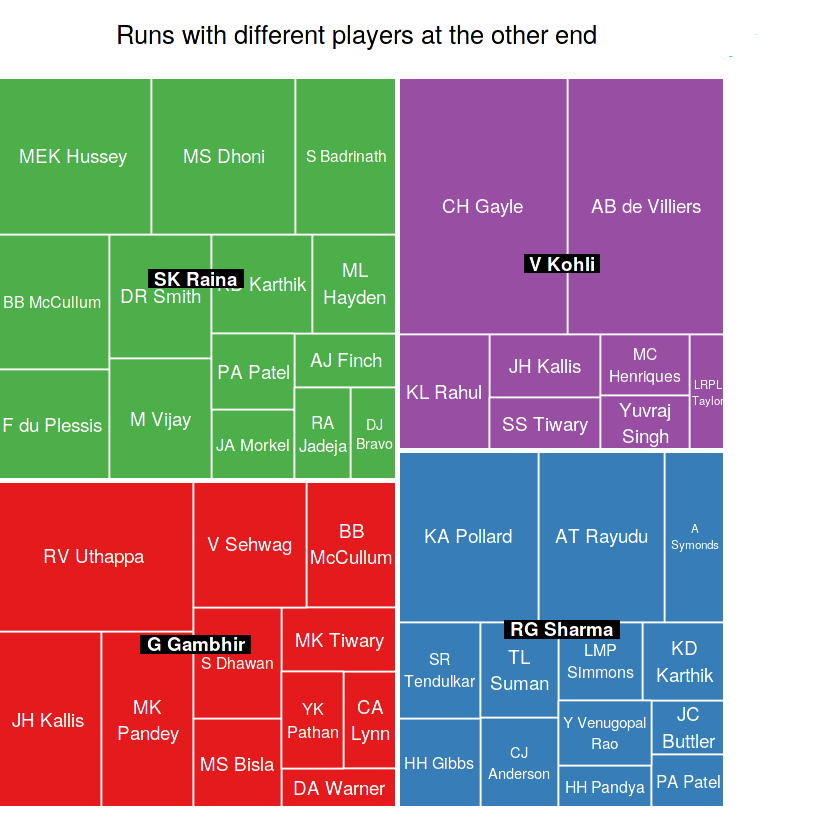

In [22]:
df<-deliveries %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir")  %>% 
    group_by(batsman,non_striker) %>% summarise(runs = sum(batsman_runs)) %>% filter(runs >100)
  treemap(df, #Your data frame object
          index=c("batsman","non_striker"),  #A list of your categorical variables
          vSize = "runs", 
          vColor = "batsman",
          type="categorical", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(6,"Set1"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 15,
          fontfamily.title = "serif",
          fontfamily.labels = "italic",
          title = "Runs with different players at the other end ",
          aspRatio = 1,
          border.col="#FFFFFF",bg.labels = "black" ,fontcolor.labels= "#FFFFFF",fontsize.legend = 0
  )

**Type of Dismissals**

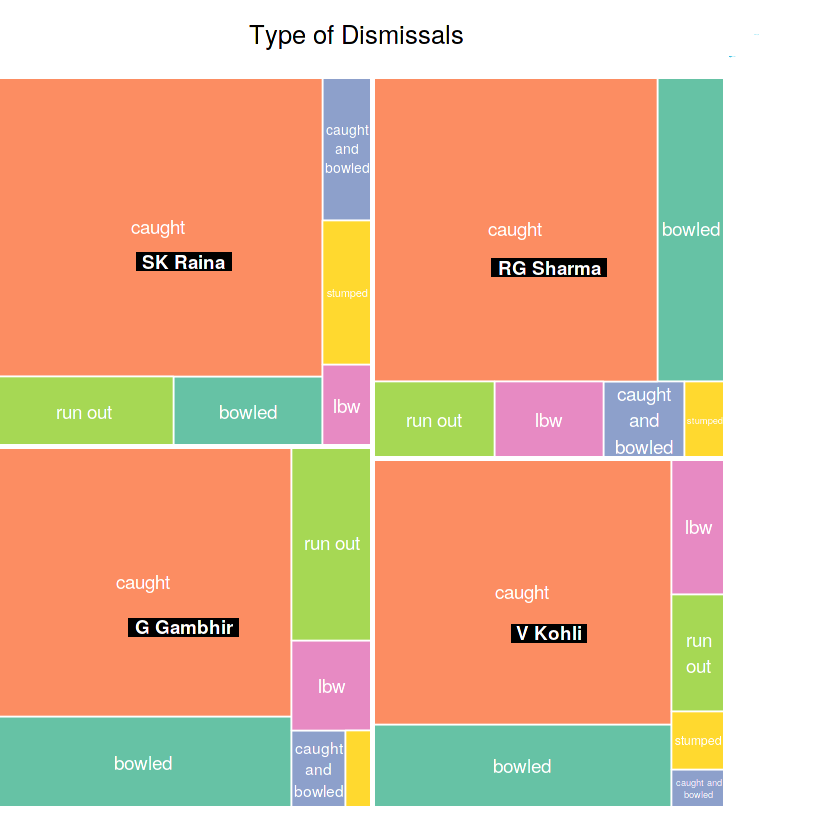

In [23]:
 df<-deliveries %>% 
    filter(player_dismissed=="V Kohli"| player_dismissed=="SK Raina" |player_dismissed=="RG Sharma"|player_dismissed=="G Gambhir") %>%
    group_by(player_dismissed,dismissal_kind) %>% summarise(type= length(dismissal_kind))
  
  treemap(df, #Your data frame object
          index=c("player_dismissed","dismissal_kind"),  #A list of your categorical variables
          vSize = "type", 
          vColor = "dismissal_kind",
          type="categorical", #Type sets the organization and color scheme of your treemap
          palette = brewer.pal(6,"Set2"),  #Select your color palette from the RColorBrewer presets or make your own.
          fontsize.title = 15,
          fontfamily.title = "serif",
          fontfamily.labels = "italic",
          title = "Type of Dismissals ",
          aspRatio = 1,
          border.col="#FFFFFF",bg.labels = "black" ,fontcolor.labels= "#FFFFFF",fontsize.legend = 0
  )

**Strike rate in different stages of the game**

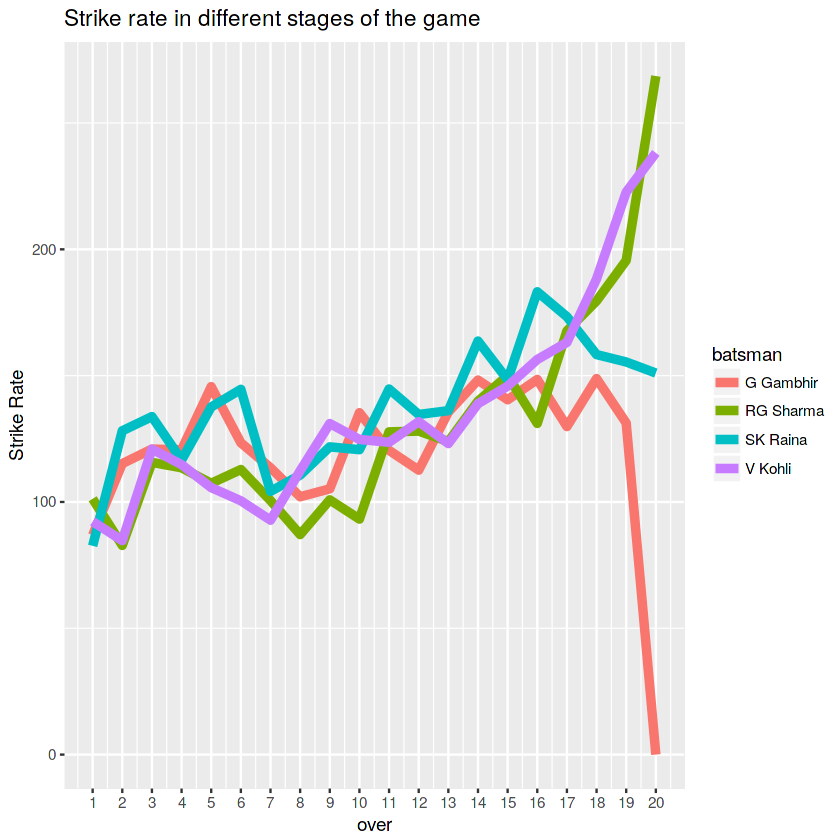

In [24]:
deliveries %>% 
    filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
    group_by(batsman,over) %>% summarise(strike= mean(batsman_runs)*100) %>%  
    ggplot(aes(over,strike, col=batsman)) + geom_line(size=2) + ylab("Strike Rate") + 
    ggtitle("Strike rate in different stages of the game ") + scale_x_continuous(breaks = 1:20)

**Season wise comparison(Runs)**

In [25]:
deliveries %>% left_join(matches) %>% 
  filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
  group_by(batsman,season) %>% summarise(runs = sum(batsman_runs)) %>%
    ggplot(aes(season,runs, col=batsman)) +geom_line(size= 2) + ggtitle("Season wise comparision(Runs)") +
    scale_x_continuous(breaks = 2008:2018)
    

ERROR: Error: `by` required, because the data sources have no common variables


**Season wise comparison(Boundaries)**

In [26]:
 deliveries %>% left_join(matches) %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
   filter(batsman_runs==4|batsman_runs==6) %>% group_by(batsman,season) %>% summarise(boundaries= length(batsman_runs)) %>%
    ggplot(aes(season,boundaries, col=batsman)) +geom_line(size= 2) + ggtitle("Season wise comparision(Boundaries)") +
    scale_x_continuous(breaks = 2008:2018)

ERROR: Error: `by` required, because the data sources have no common variables


**Distribution of Runs**

In [27]:
deliveries %>% left_join(matches) %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
  group_by(batsman,batsman_runs) %>% summarise(freq=length(batsman_runs)) %>% filter(batsman_runs != 5) %>%
    ggplot(aes(batsman,freq,fill=as.factor(batsman_runs))) + 
    geom_bar(stat = "identity",position= "dodge") + coord_flip() + ylab("Frequency") + xlab(" Batsman") +
    labs(fill="Type of runs scored")

ERROR: Error: `by` required, because the data sources have no common variables


Innings Progression
-------------------

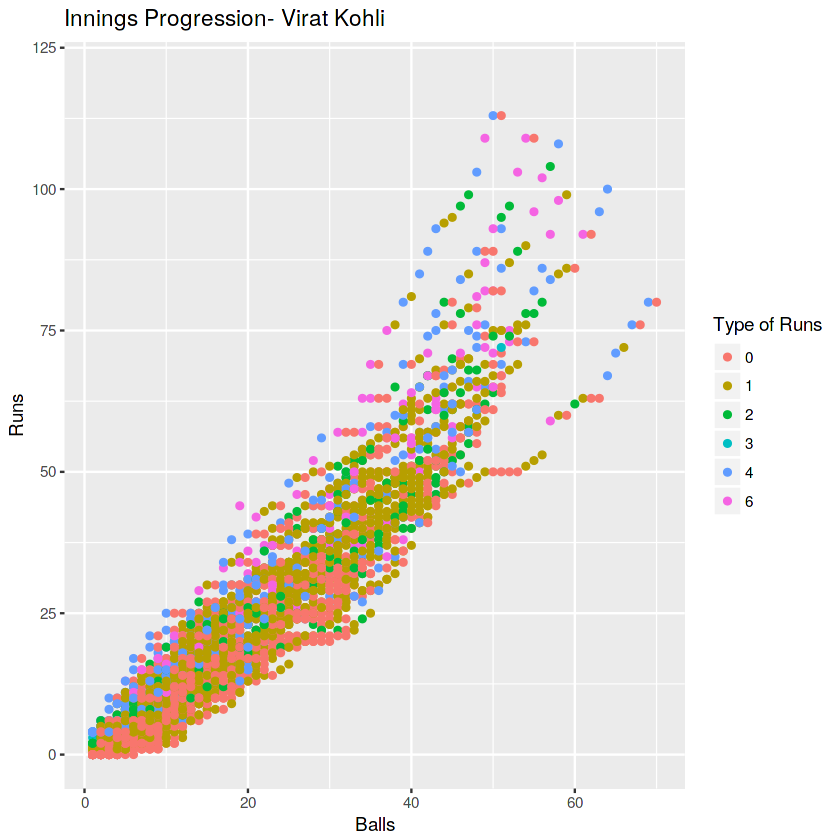

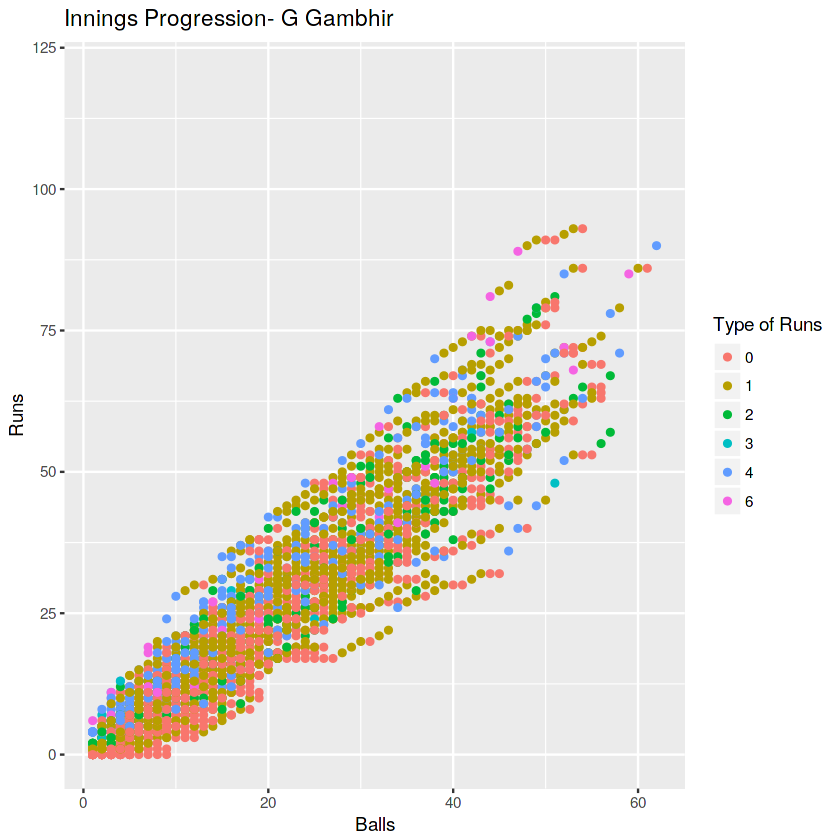

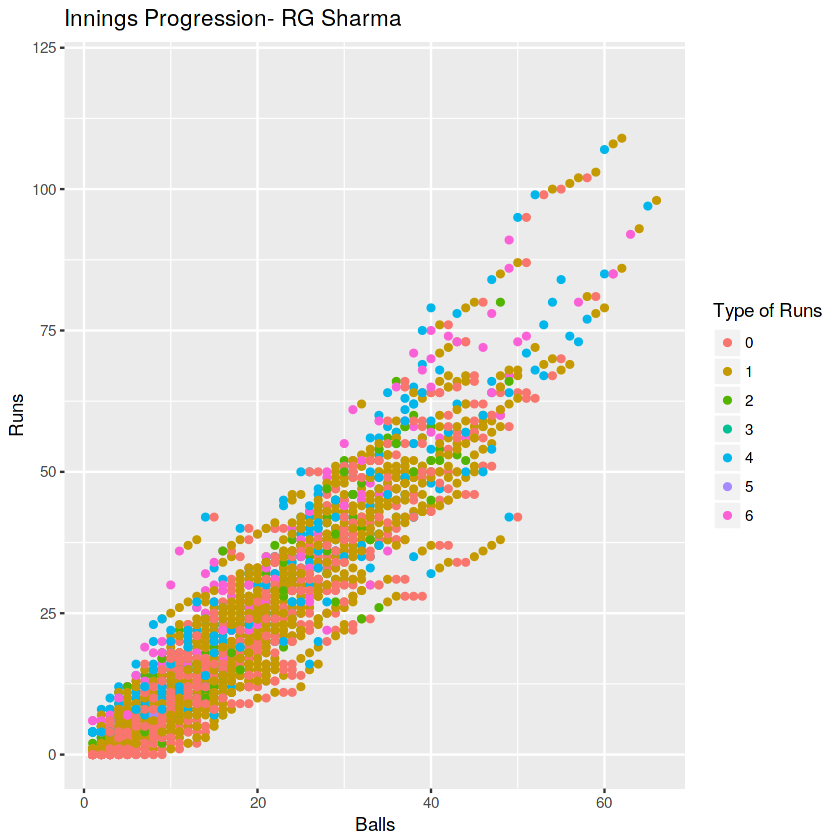

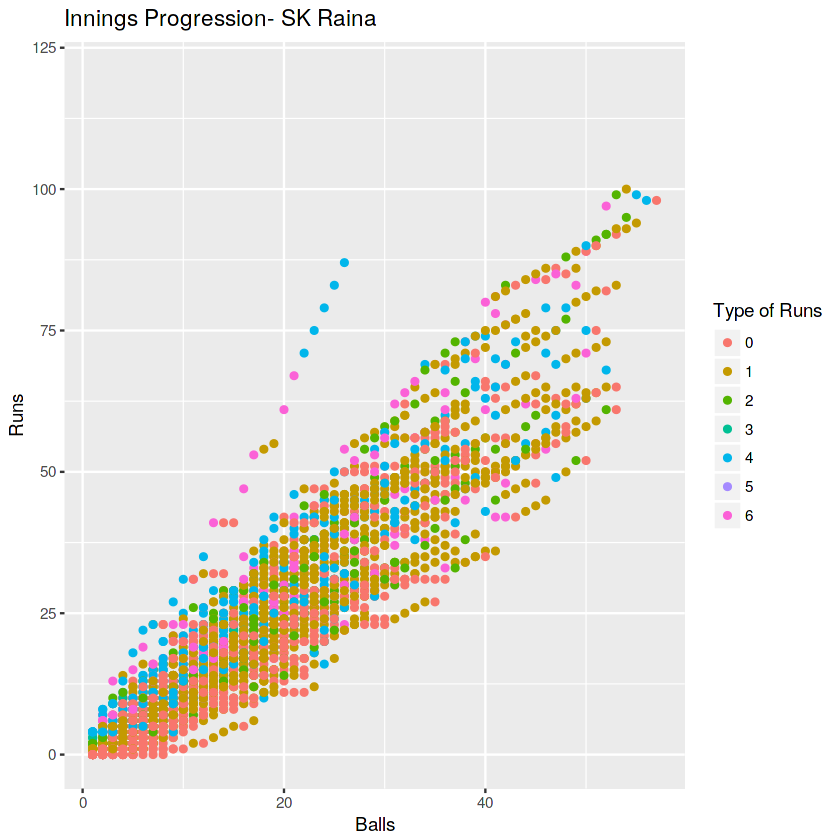

In [28]:
 deliveries %>% filter(batsman=="V Kohli") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- Virat Kohli") +  coord_cartesian(ylim = c(0, 120)) 

 deliveries %>% filter(batsman=="G Gambhir") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- G Gambhir")+  coord_cartesian(ylim = c(0, 120)) 
 deliveries %>% filter(batsman=="RG Sharma") %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- RG Sharma")+  coord_cartesian(ylim = c(0, 120)) 
 deliveries %>% filter( batsman=="SK Raina" ) %>%
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col= as.factor(batsman_runs))) + 
    geom_point()  + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression- SK Raina")+  coord_cartesian(ylim = c(0, 120)) 

Joining, by = "match_id"


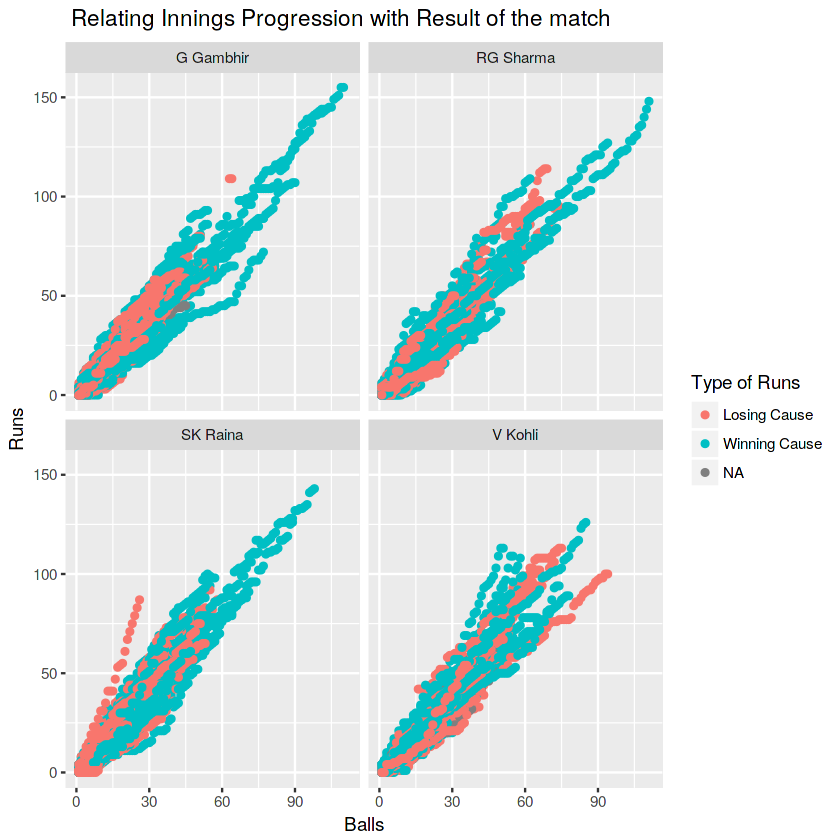

In [29]:
colnames(matches)[1]<- "match_id" 
deliveries %>% left_join(matches) %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>%
    group_by(match_id) %>% 
   mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    ggplot(aes(cum_ball,cum_run,col=ifelse(as.character(batting_team)==as.character(winner),"Winning Cause","Losing Cause"))) + 
    geom_point() + facet_wrap(~batsman,ncol=2) + labs(col="Type of Runs") + xlab("Balls") + ylab("Runs")+
    ggtitle(" Relating Innings Progression with Result of the match")

Joining, by = "match_id"


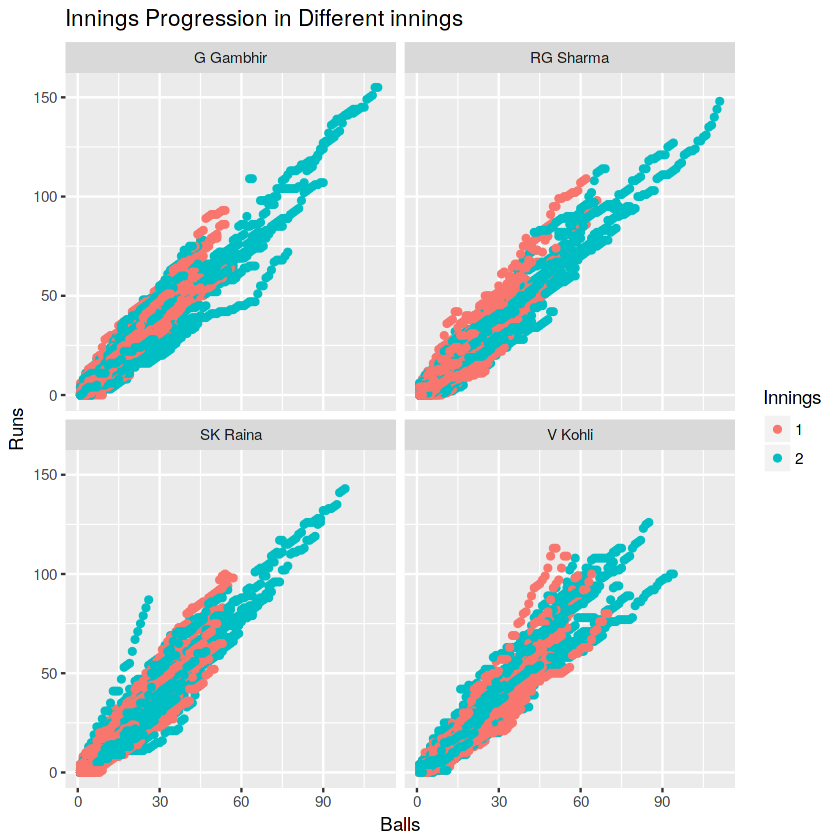

In [30]:
 deliveries %>%  left_join(matches) %>% filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% 
    group_by(match_id) %>% 
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>% filter(is_super_over==0) %>%
    ggplot(aes(cum_ball,cum_run,col=as.factor(inning))) + geom_point()  + facet_wrap(~batsman,ncol=2) + labs(col="Innings") + xlab("Balls") + ylab("Runs")+
    ggtitle("Innings Progression in Different innings")

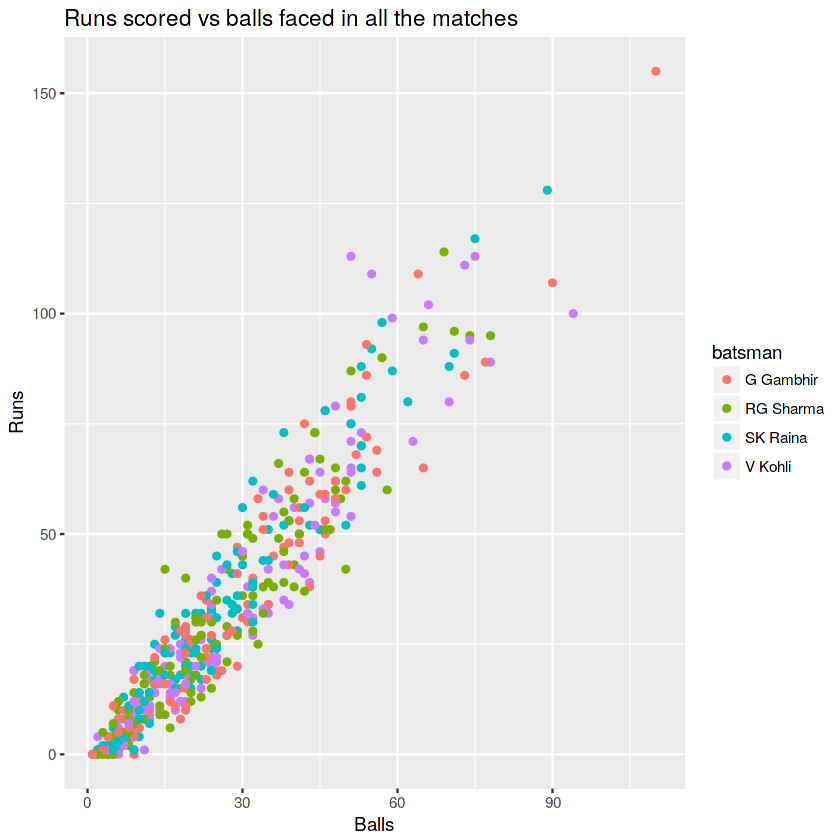

In [31]:
 deliveries %>%filter(batsman=="V Kohli"| batsman=="SK Raina" |batsman=="RG Sharma"|batsman=="G Gambhir") %>% group_by(match_id) %>%
    mutate(cum_run= cumsum(batsman_runs),cum_ball=1:length(match_id)) %>%
    filter(player_dismissed=="V Kohli"|player_dismissed=="SK Raina" |player_dismissed=="RG Sharma"|player_dismissed=="G Gambhir") %>% 
    ggplot(aes(cum_ball,cum_run,col=batsman)) +geom_point() + xlab("Balls") +ylab("Runs")+ ggtitle("Runs scored vs balls faced in all the matches")
  
  

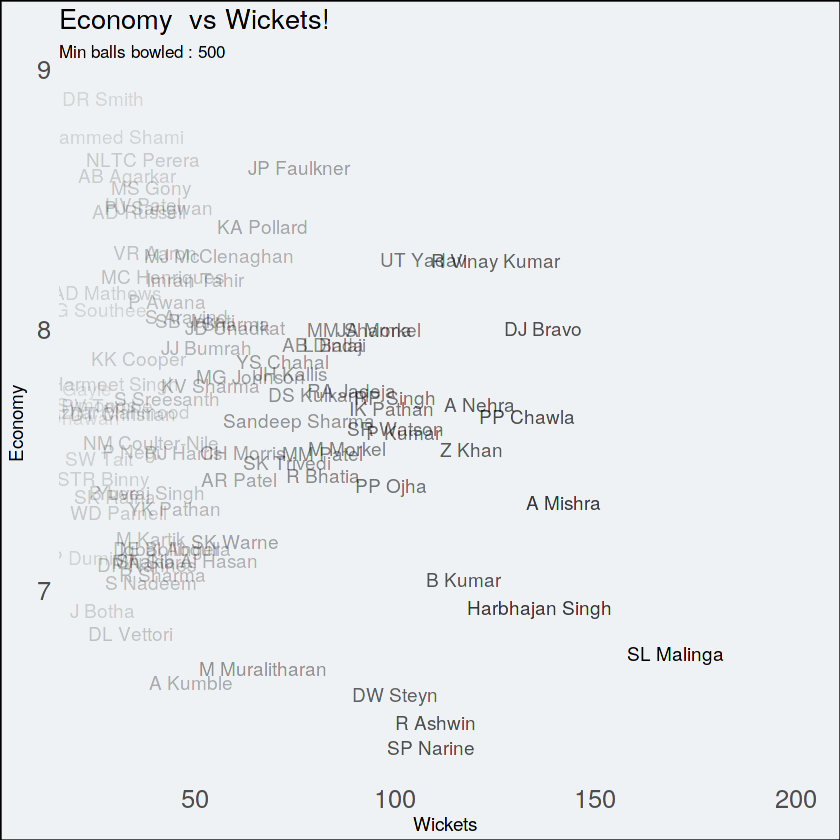

In [32]:
deliveries %>% 
    group_by(bowler) %>% filter(length(ball) > 500) %>% 
    summarise(Economy= mean(total_runs)*6, Wickets = length(which(player_dismissed!="")) ) %>% 
    ggplot(aes(Wickets,Economy,label=bowler,alpha= Wickets/Economy)) +geom_text(color="black") + theme_minimal(base_family = "Ubuntu Condensed")+
    theme(legend.position = "none",
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.grid.minor.y = element_blank(),
          panel.grid.major.y = element_blank(),
          plot.background = element_rect(fill = "#EFF2F4"),
          axis.text = element_text(size = 15),
          plot.title = element_text(size=16)) +
    ggtitle("Economy  vs Wickets!",subtitle = "Min balls bowled : 500") + 
    coord_cartesian(xlim = c(25, 200)) 
          
          
  
  
  